*Project Description*

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.


In [10]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [15]:
#Read and study the provided datasets

df = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx')
 
print(df)

                   TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                       North Indian, Burger, Kebab   
12686      

In [16]:
#Explore the dataset

df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [17]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [18]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [19]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (12690, 9)

The column headers in the dataset: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


It was observed that the dataset contains 12690ows and 9 columns out of which one is the variable of interest ('COST

In [20]:
#Check the description of the dataset and proceed with exploratory data analysis

df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [21]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

It could be observed that the dataset contains 2 different types of data (object and int64)

In [22]:
#Check the null (missing) values in the dataset

df.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

There were missing values in Title, City, Locality, Rating and Votes features in the dataset

In [23]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


<Axes: >

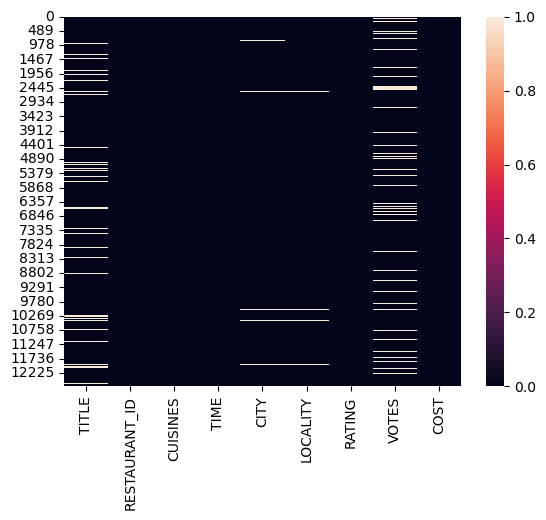

In [24]:
#Visualization with heatmap

sns.heatmap(df.isnull())

In [25]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
TITLE,112
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [26]:
#This value should be checked per column as follows in order to see the value count per column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

TITLE
QUICK BITES               4218
CASUAL DINING             3652
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64


RESTAURANT_ID
7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: count, Length: 11892, dtype: int64


CUISINES
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Europ

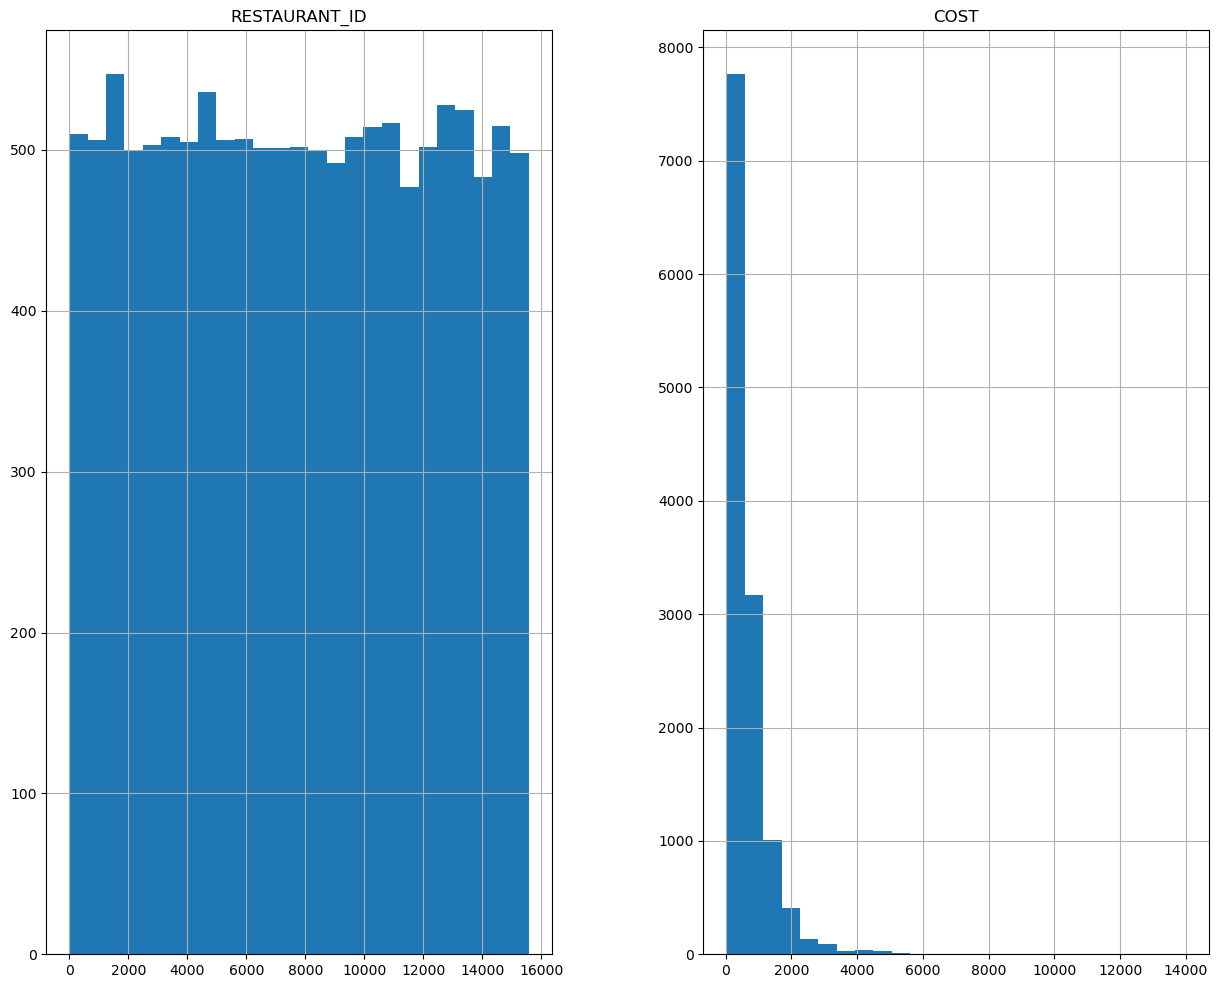

In [27]:
#Use visualization to further determine how the data is distributed on the features and display

df.hist(bins=25,figsize=(15,12))

plt.show()